In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('../Datasets/loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Muhammad Taha\AppData\Local\Temp\ipykernel_19780\1526187818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


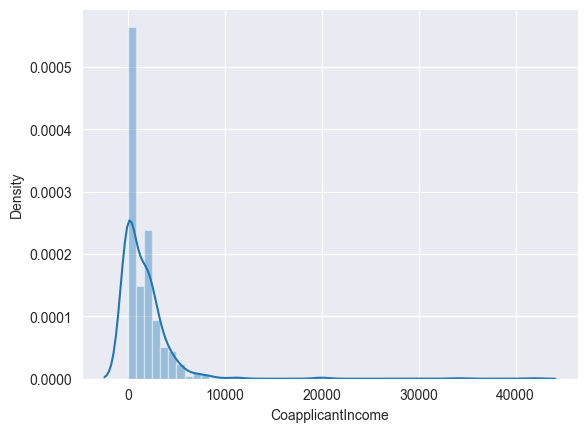

In [49]:
sns.distplot(data['CoapplicantIncome'])
plt.show()

In [50]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q3 = data['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1

print(iqr)

2297.25


In [51]:
min_range = q1 - 1.5 * iqr
max_range = q3 + 1.5 * iqr

print(min_range, max_range)

-3445.875 5743.125


In [52]:
data = data[data['CoapplicantIncome'] < max_range]

C:\Users\Muhammad Taha\AppData\Local\Temp\ipykernel_19780\1526187818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


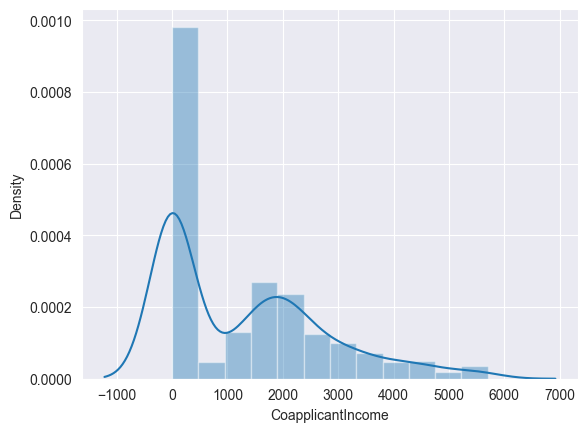

In [53]:
sns.distplot(data['CoapplicantIncome'])
plt.show()

In [54]:
from sklearn.preprocessing import FunctionTransformer

In [55]:
ft = FunctionTransformer(func= lambda x: x**2)
# ft = FunctionTransformer(func=np.log1p)

In [56]:
ft.fit(data[['CoapplicantIncome']])

FunctionTransformer(func=<function <lambda> at 0x000001C26FA87CE0>)

In [57]:
data['CoapplicantIncome_tf'] = ft.transform(data[['CoapplicantIncome']])

C:\Users\Muhammad Taha\AppData\Local\Temp\ipykernel_19780\2487045408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])
C:\Users\Muhammad Taha\AppData\Local\Temp\ipykernel_19780\2487045408.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome_tf'

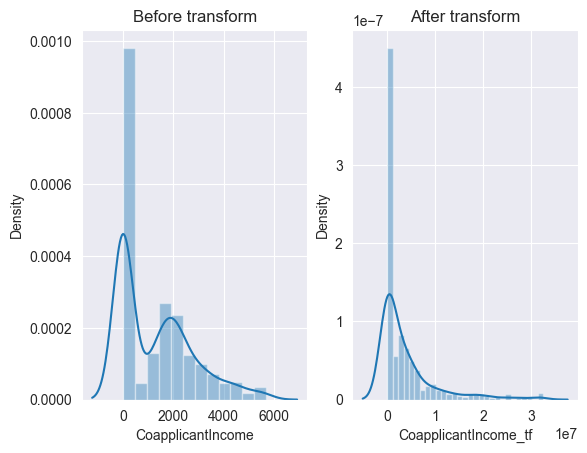

In [58]:
plt.subplot(1, 2, 1)
sns.distplot(data['CoapplicantIncome'])
plt.title("Before transform")
plt.subplot(1, 2, 2)
sns.distplot(data['CoapplicantIncome_tf'])
plt.title("After transform")
plt.show()